# HafniaDataset
Read from path

In [4]:
from pathlib import Path

from hafnia.dataset.hafnia_dataset import HafniaDataset

path_hafnia_dataset = Path(
    "../../data-management/src/data_management/encord_datasets/midwest_vehicle_detection/pipeline_data/extracted_images/hidden"
)
dataset = HafniaDataset.read_from_path(path_hafnia_dataset)


Reading dataset annotations from Parquet file: ../../data-management/src/data_management/encord_datasets/midwest_vehicle_detection/pipeline_data/extracted_images/hidden/annotations.parquet


Check image paths:  61%|██████    | 8002/13080 [00:00<00:00, 80013.40it/s]

Check image paths: 100%|██████████| 13080/13080 [00:00<00:00, 83314.34it/s]


In [5]:
# stats:
dataset.print_stats()

               Dataset Statistics                
                                                 
  Property            Value                      
 ─────────────────────────────────────────────── 
  Dataset Name        midwest-vehicle-detection  
                                                 
  Version             1.0.0                      
                                                 
  Number of samples   13080

[
    TaskInfo(
        primitive=<class 'hafnia.dataset.shape_primitives.Bbox'>,
        class_names=[
            'Person',
            'Vehicle.Bicycle',
            'Vehicle.Motorcycle',
            'Vehicle.Car',
            'Vehicle.Van',
            'Vehicle.RV',
            'Vehicle.Single_Truck',
            'Vehicle.Combo_Truck',
            'Vehicle.Pickup_Truck',
            'Vehicle.Trailer',
            'Vehicle.Emergency_Vehicle',
            'Vehicle.Bus',
            'Vehicle.Heavy_Duty_Vehicle'
        ],
        name='bboxes'
    ),
    TaskInfo(
        primitive=<class 'hafnia.dataset.shape_primitives.Classification'>,
        class_names=['Clear', 'Foggy'],
        name='Weather'
    ),
    TaskInfo(
        primitive=<class 'hafnia.dataset.shape_primitives.Classification'>,
        class_names=['Dry', 'Wet'],
        name='Surface Conditions'
    )
]

Dataset stats in 0.07 seconds.


                                                Dataset Statistics                                                 
                                                                                                                   
                                  Classifica…   Classifica…   Classific…                 Classific…                
                         Bbox     Location      Geographic…   Surface      Classifica…   Camera       Classifica…  
  Split        Sample    bboxes   Continent     Context       Conditions   Weather       Motion       Time of Day  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  All          13080     125791   13080         13080         13080        13080         13080        12480        
                                                                                                                   
  Train        10440     94695    9960          10440         10440        10440         10440        10440        
                                                                                                                   
  Validation   440       5334     420           440           440          440           440          440          
                                                                                                                   
  Test         2200      25762    2200          2100          2200         2200          2200         2200        

A HafniaDataset contains a polars table and project information

In [6]:
# Contains a polars table with annotations
dataset.table.head(2)  # polars table

image_id,file_name,height,width,split,is_sample,frame_number,video_name,classifications,objects,bitmasks,polygons,meta
str,str,i64,i64,str,bool,null,null,list[struct[6]],list[struct[10]],null,null,struct[5]
"""7800""","""/home/ubuntu/code/hafnia/noteb…",1080,1920,"""test""",true,null,null,"[{""Clear"",0,null,true,""Weather"",null}, {""Dry"",0,null,true,""Surface Conditions"",null}, … {""North_America"",0,null,true,""Location Continent"",null}]","[{0.0492,0.0357,0.2083,0.23,""Vehicle.Car"",3,""cXT4NRVu"",true,""bboxes"",null}, {0.0457,0.0408,0.2521,0.2153,""Vehicle.Car"",3,""MelbIIDU"",true,""bboxes"",null}, … {0.387295,0.363459,0.526586,0.612705,""Vehicle.Pickup_Truck"",8,""mVfVSC3B"",true,""bboxes"",null}]",null,null,"{120.0,1.0,""2024-07-10T18:30:00-0500"",""2024-08-26T11:02:13+0000"",""f29fa5d4-3ed9-4da6-a4a7-661f549c257a""}"
"""7801""","""/home/ubuntu/code/hafnia/noteb…",1080,1920,"""test""",false,null,null,"[{""Clear"",0,null,true,""Weather"",null}, {""Dry"",0,null,true,""Surface Conditions"",null}, … {""North_America"",0,null,true,""Location Continent"",null}]","[{0.0492,0.0357,0.2083,0.23,""Vehicle.Car"",3,""cXT4NRVu"",true,""bboxes"",null}, {0.0457,0.0408,0.2521,0.2153,""Vehicle.Car"",3,""MelbIIDU"",true,""bboxes"",null}, … {0.0328,0.0321,0.7852,0.1503,""Vehicle.Pickup_Truck"",8,""akQ0U8r+"",true,""bboxes"",null}]",null,null,"{120.0,1.0,""2024-07-10T18:30:00-0500"",""2024-08-26T11:02:13+0000"",""f29fa5d4-3ed9-4da6-a4a7-661f549c257a""}"


In [7]:
# Contains 'info' with metadata about the dataset
import rich

rich.print(dataset.info)  # dataset info

DatasetInfo(
    dataset_name='midwest-vehicle-detection',
    version='1.0.0',
    tasks=[
        TaskInfo(
            primitive=<class 'hafnia.dataset.shape_primitives.Bbox'>,
            class_names=[
                'Person',
                'Vehicle.Bicycle',
                'Vehicle.Motorcycle',
                'Vehicle.Car',
                'Vehicle.Van',
                'Vehicle.RV',
                'Vehicle.Single_Truck',
                'Vehicle.Combo_Truck',
                'Vehicle.Pickup_Truck',
                'Vehicle.Trailer',
                'Vehicle.Emergency_Vehicle',
                'Vehicle.Bus',
                'Vehicle.Heavy_Duty_Vehicle'
            ],
            name='bboxes'
        ),
        TaskInfo(
            primitive=<class 'hafnia.dataset.shape_primitives.Classification'>,
            class_names=['Clear', 'Foggy'],
            name='Weather'
        ),
        TaskInfo(
            primitive=<class 'hafnia.dataset.shape_primitives.Classification'>,
            class_names=['Dry', 'Wet'],
            name='Surface Conditions'
        )
    ],
    distributions=[
        TaskInfo(
            primitive=<class 'hafnia.dataset.shape_primitives.Classification'>,
            class_names=['Clear', 'Foggy'],
            name='Weather'
        ),
        TaskInfo(
            primitive=<class 'hafnia.dataset.shape_primitives.Classification'>,
            class_names=['Dry', 'Wet'],
            name='Surface Conditions'
        ),
        TaskInfo(
            primitive=<class 'hafnia.dataset.shape_primitives.Classification'>,
            class_names=['Urban'],
            name='Geographical Context'
        ),
        TaskInfo(
            primitive=<class 'hafnia.dataset.shape_primitives.Classification'>,
            class_names=['Twilight.Dusk', 'Night', 'Sunrise/Sunset.Sunrise', 'Day', 'Sunrise/Sunset.Sunset'],
            name='Time of Day'
        ),
        TaskInfo(
            primitive=<class 'hafnia.dataset.shape_primitives.Classification'>,
            class_names=['Static_View'],
            name='Camera Motion'
        ),
        TaskInfo(
            primitive=<class 'hafnia.dataset.shape_primitives.Classification'>,
            class_names=['North_America'],
            name='Location Continent'
        )
    ],
    meta={
        'annotation_project_id': '32f4b54a-3002-4b5d-b14f-b472e5ba8269',
        'n_videos': 109,
        'n_cameras': 20,
        'duration': 13080.0,
        'duration_average': 120.0,
        'frame_rate': 1.0,
        'data_captured_start': '2024-07-03T05:45:00-05:00',
        'data_captured_end': '2024-10-29T19:00:00-05:00',
        'data_received_start': '2024-08-26T11:02:09Z',
        'data_received_end': '2024-10-30T09:37:51Z',
        'annotation_dataset_id': 'f29fa5d4-3ed9-4da6-a4a7-661f549c257a'
    }
)

## Read and write to disk

In [8]:
path_tmp = Path("../.data") / "tmp_hafnia_dataset"
if False:
    # Write a hafnia dataset to path
    dataset.write(path_tmp)

    # Read dataset again from path
    dataset_again = HafniaDataset.read_from_path(path_tmp)

## Iterate dataset / Parsing sample/objects
Below is an example of how to iterate over a dataset and parse samples/objects from 
dictionary to python objects.

In [9]:
# Iterate dataset:
from hafnia.dataset.hafnia_dataset import Sample
from hafnia.dataset.shape_primitives import Bbox, Polygon, Point, Bitmask, Classification


for sample_dict in dataset:
    sample = Sample(**sample_dict)  # THIS PART IS IMPORTANT!!
    image = sample.read_image()  # Read image from sample
    annotations_all = sample.get_annotations()  # Get all annotations from the sample
    break

print(sample_dict)
rich.print(annotations_all[0])
rich.print(sample)

{'image_id': '7800', 'file_name': '/home/ubuntu/code/hafnia/notebooks/../../data-management/src/data_management/encord_datasets/midwest_vehicle_detection/pipeline_data/extracted_images/hidden/data/video_0026a86b-2f43-49f2-a17c-59244d10a585_1fps_mp4_frame_00000.png', 'height': 1080, 'width': 1920, 'split': 'test', 'is_sample': True, 'frame_number': None, 'video_name': None, 'classifications': [{'class_name': 'Clear', 'class_idx': 0, 'object_id': None, 'draw_label': True, 'task_name': 'Weather', 'meta': None}, {'class_name': 'Dry', 'class_idx': 0, 'object_id': None, 'draw_label': True, 'task_name': 'Surface Conditions', 'meta': None}, {'class_name': 'Urban', 'class_idx': 0, 'object_id': None, 'draw_label': True, 'task_name': 'Geographical Context', 'meta': None}, {'class_name': 'Day', 'class_idx': 3, 'object_id': None, 'draw_label': True, 'task_name': 'Time of Day', 'meta': None}, {'class_name': 'Static_View', 'class_idx': 0, 'object_id': None, 'draw_label': True, 'task_name': 'Camera Mo

Bbox(
    height=0.0492,
    width=0.0357,
    top_left_x=0.2083,
    top_left_y=0.23,
    class_name='Vehicle.Car',
    class_idx=3,
    object_id='cXT4NRVu',
    confidence=None,
    draw_label=True,
    task_name='bboxes',
    meta=None
)

Sample(
    image_id='7800',
    file_name='/home/ubuntu/code/hafnia/notebooks/../../data-management/src/data_management/encord_datasets/midwest
_vehicle_detection/pipeline_data/extracted_images/hidden/data/video_0026a86b-2f43-49f2-a17c-59244d10a585_1fps_mp4_f
rame_00000.png',
    height=1080,
    width=1920,
    split='test',
    is_sample=True,
    frame_number=None,
    video_name=None,
    classifications=[
        Classification(
            class_name='Clear',
            class_idx=0,
            object_id=None,
            confidence=None,
            draw_label=True,
            task_name='Weather',
            meta=None
        ),
        Classification(
            class_name='Dry',
            class_idx=0,
            object_id=None,
            confidence=None,
            draw_label=True,
            task_name='Surface Conditions',
            meta=None
        ),
        Classification(
            class_name='Urban',
            class_idx=0,
            object_id=None,
            confidence=None,
            draw_label=True,
            task_name='Geographical Context',
            meta=None
        ),
        Classification(
            class_name='Day',
            class_idx=3,
            object_id=None,
            confidence=None,
            draw_label=True,
            task_name='Time of Day',
            meta=None
        ),
        Classification(
            class_name='Static_View',
            class_idx=0,
            object_id=None,
            confidence=None,
            draw_label=True,
            task_name='Camera Motion',
            meta=None
        ),
        Classification(
            class_name='North_America',
            class_idx=0,
            object_id=None,
            confidence=None,
            draw_label=True,
            task_name='Location Continent',
            meta=None
        )
    ],
    objects=[
        Bbox(
            height=0.0492,
            width=0.0357,
            top_left_x=0.2083,
            top_left_y=0.23,
            class_name='Vehicle.Car',
            class_idx=3,
            object_id='cXT4NRVu',
            confidence=None,
            draw_label=True,
            task_name='bboxes',
            meta=None
        ),
        Bbox(
            height=0.0457,
            width=0.0408,
            top_left_x=0.2521,
            top_left_y=0.2153,
            class_name='Vehicle.Car',
            class_idx=3,
            object_id='MelbIIDU',
            confidence=None,
            draw_label=True,
            task_name='bboxes',
            meta=None
        ),
        Bbox(
            height=0.03782894736842105,
            width=0.051277963792200135,
            top_left_x=0.5490740740740755,
            top_left_y=0.15296052631578955,
            class_name='Vehicle.Car',
            class_idx=3,
            object_id='hhFzat0k',
            confidence=None,
            draw_label=True,
            task_name='bboxes',
            meta=None
        ),
        Bbox(
            height=0.08,
            width=0.0788,
            top_left_x=0.6462,
            top_left_y=0.1135,
            class_name='Vehicle.Single_Truck',
            class_idx=6,
            object_id='6P/C7vcK',
            confidence=None,
            draw_label=True,
            task_name='bboxes',
            meta=None
        ),
        Bbox(
            height=0.0402,
            width=0.0421,
            top_left_x=0.6799,
            top_left_y=0.1653,
            class_name='Vehicle.Car',
            class_idx=3,
            object_id='uUUqX5zk',
            confidence=None,
            draw_label=True,
            task_name='bboxes',
            meta=None
        ),
        Bbox(
            height=0.0381,
            width=0.0387,
            top_left_x=0.7212,
            top_left_y=0.1579,
            class_name='Vehicle.Car',
            class_idx=3,
            object_id='Qft/kZbS',
            confidence=None,
            draw_label=True,
            task_name='bbo

### Parsing and validating samples/objects
What just happened in this line `sample = Sample(**sample_dict)` ??? 

A (nested) dictionary is converted into a python object (`Sample`) by simply unpacking the dictionary into the class constructor. 

This is possible because `Sample` and `Primitives` are defined as `pydantic` models. 

Advanges of using `pydantic` models:
- Automatic validation of the data. Ensures the data conforms to the expected schema.
- Works with your IDE/mypy to provide hints, autocompletion and error checking.
- It is easy to convert between json/dictionaries and python objects.
- Creating `Sample` or annotations (`BBox`, `Bitmask`, `Polygon`...) can be validated immediately and stored to disk.

In [10]:
from hafnia.dataset.shape_primitives import Classification
from PIL import Image
# Checkout how Sample is implemented
# Sample

# Checkout how 'Bbox' is implemented
# Bbox


classifications = [
    Classification(
        class_name="Sunny/Clear", class_idx=0, object_id=None, draw_label=True, task_name="Weather", meta=None
    ),
    Classification(
        class_name="Twilight", class_idx=3, object_id=None, draw_label=True, task_name="Time of Day", meta=None
    ),
]

# Define objects bounding boxes. It could also be other objects Bitmask, Polygon
objects = [
    Bbox(
        height=0.10058,
        width=0.08105,
        top_left_x=0.54785,
        top_left_y=0.2207,
        class_name="Vehicle.Single_Truck",
        class_idx=6,
        object_id="aNJlrkmW",
        meta=None,
    ),
    Bbox(
        height=0.0322265625,
        width=0.0361328125,
        top_left_x=0.6318359375,
        top_left_y=0.2666015625,
        class_name="Vehicle.Car",
        class_idx=3,
        object_id="ZMeevOXB",
        draw_label=True,
        task_name="bboxes",
        meta=None,
    ),
]

sample = Sample(
    image_id="8",
    file_name=str(path_hafnia_dataset / "data/video_968a1b31-4a22-4c3e-bf36-5cd60281954b_1fps_mp4_frame_00008.png"),
    height=1080,
    width=1920,
    split="validation",
    is_sample=True,
    frame_number=None,
    video_name=None,
    meta={
        "video.data_duration": 120.0,
        "video.data_fps": 1.0,
        "videoDownload.from": "2024-07-10T18:30:00+0000",
        "videoDownload.downloadStart": "2024-08-26T11:02:10+0000",
        "dataset_hash": "9a0faaba-46d7-484a-91e8-b34b7c9ef236",
    },
    classifications=classifications,
    objects=objects,
    bitmasks=None,  # Add Bitmask objects here if needed
    polygons=None,  # Add Polygon objects here if needed
)

rich.print(sample)  # Print sample info

Sample(
    image_id='8',
    file_name='../../data-management/src/data_management/encord_datasets/midwest_vehicle_detection/pipeline_data/ex
tracted_images/hidden/data/video_968a1b31-4a22-4c3e-bf36-5cd60281954b_1fps_mp4_frame_00008.png',
    height=1080,
    width=1920,
    split='validation',
    is_sample=True,
    frame_number=None,
    video_name=None,
    classifications=[
        Classification(
            class_name='Sunny/Clear',
            class_idx=0,
            object_id=None,
            confidence=None,
            draw_label=True,
            task_name='Weather',
            meta=None
        ),
        Classification(
            class_name='Twilight',
            class_idx=3,
            object_id=None,
            confidence=None,
            draw_label=True,
            task_name='Time of Day',
            meta=None
        )
    ],
    objects=[
        Bbox(
            height=0.10058,
            width=0.08105,
            top_left_x=0.54785,
            top_left_y=0.2207,
            class_name='Vehicle.Single_Truck',
            class_idx=6,
            object_id='aNJlrkmW',
            confidence=None,
            draw_label=True,
            task_name='bboxes',
            meta=None
        ),
        Bbox(
            height=0.0322265625,
            width=0.0361328125,
            top_left_x=0.6318359375,
            top_left_y=0.2666015625,
            class_name='Vehicle.Car',
            class_idx=3,
            object_id='ZMeevOXB',
            confidence=None,
            draw_label=True,
            task_name='bboxes',
            meta=None
        )
    ],
    bitmasks=None,
    polygons=None,
    meta={
        'video.data_duration': 120.0,
        'video.data_fps': 1.0,
        'videoDownload.from': '2024-07-10T18:30:00+0000',
        'videoDownload.downloadStart': '2024-08-26T11:02:10+0000',
        'dataset_hash': '9a0faaba-46d7-484a-91e8-b34b7c9ef236'
    }
)

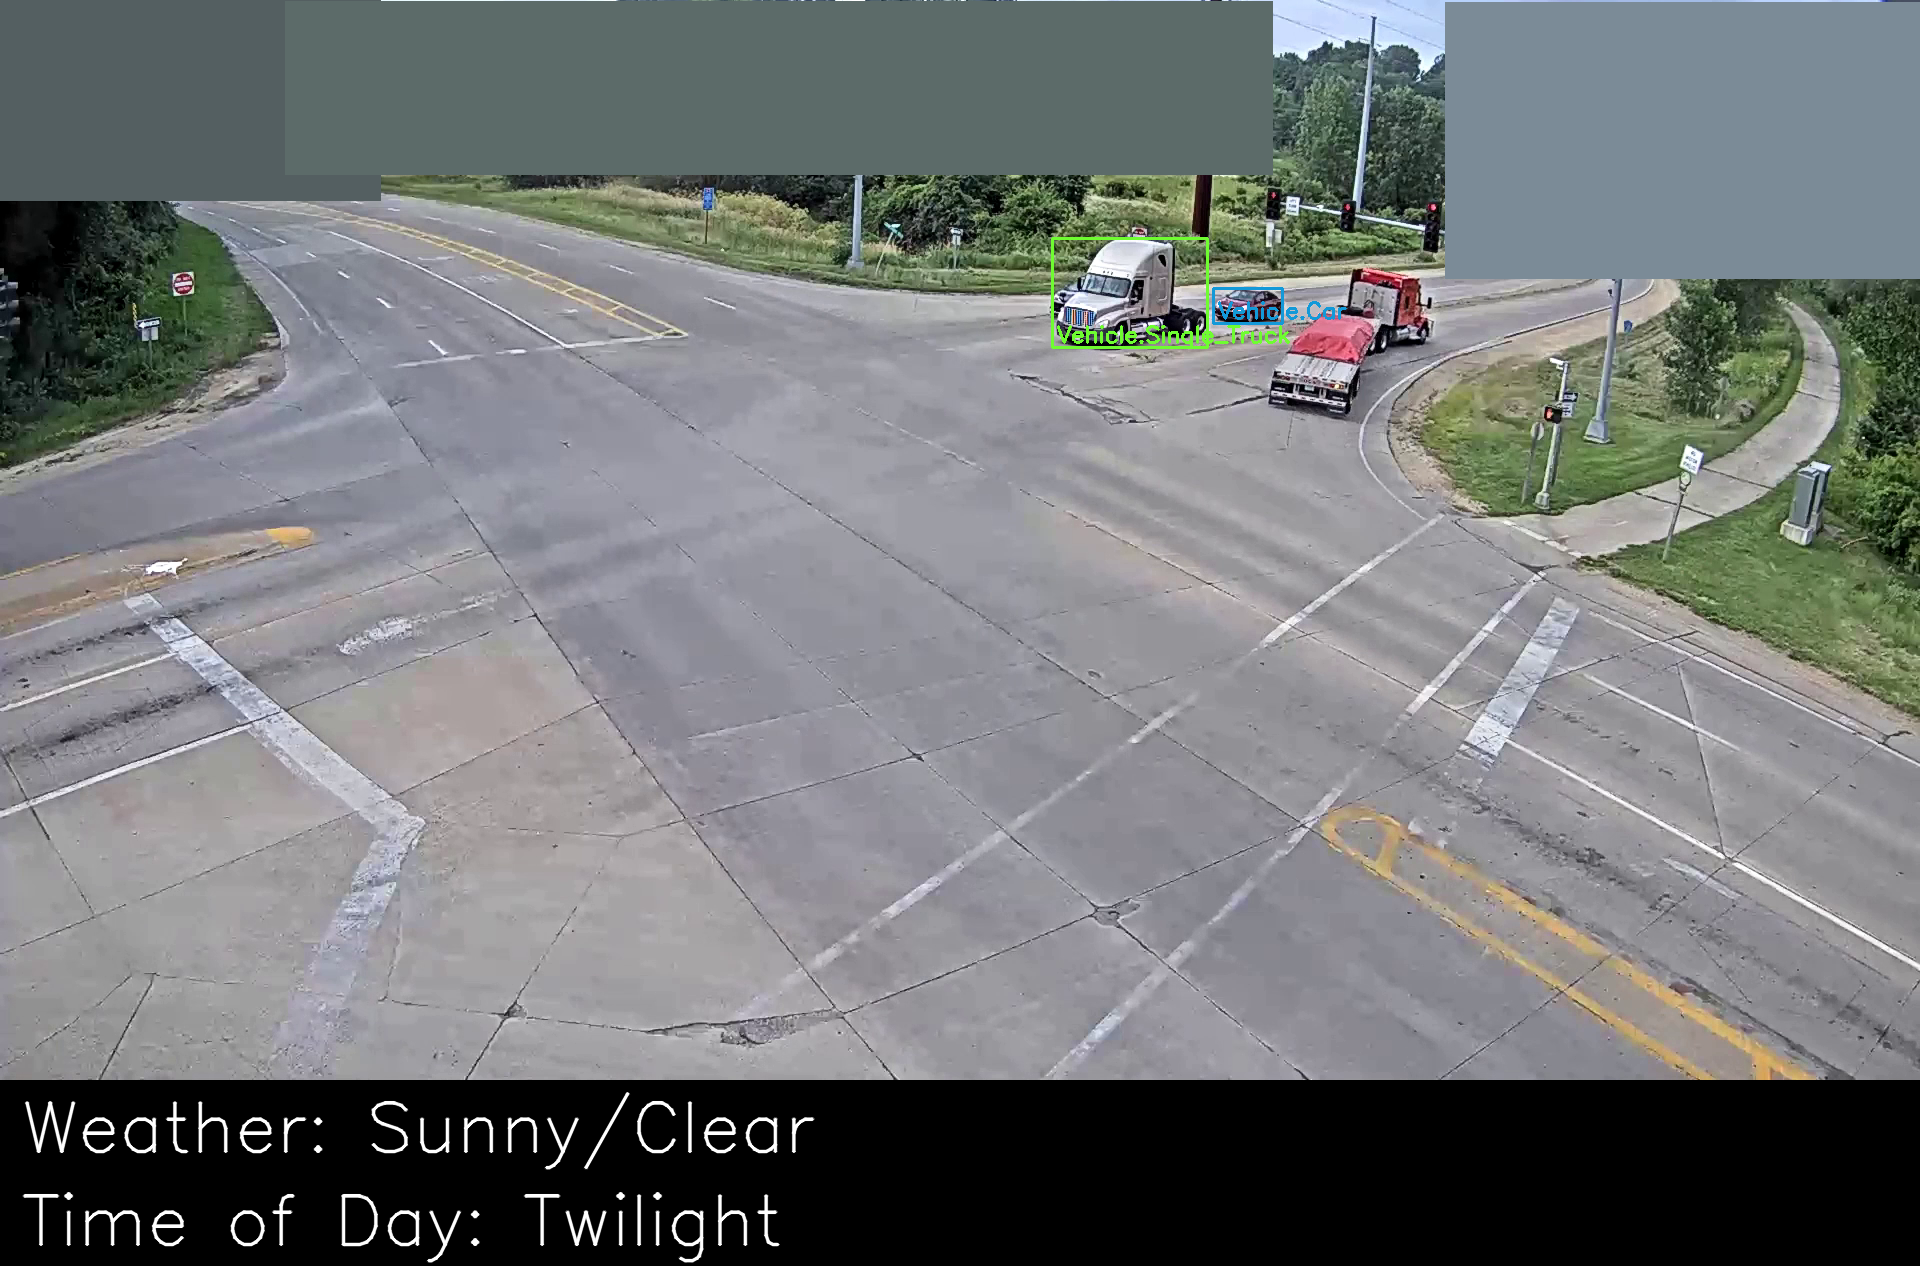

In [11]:
# Check sample by visualization
image = sample.draw_annotations()
Image.fromarray(image).show()  # Show the image with annotations

In [12]:
# Unpacks a dictionary to create a Sample object
sample = Sample(**sample_dict)

## To dict:
sample_dict = sample.model_dump()
sample_json_str = sample.model_dump_json()

# To JSON string
path_file = Path("sample.json")
path_file.write_text(sample_json_str)

# And back to Sample object
sample_again = Sample.model_validate_json(path_file.read_text())
sample_again

Sample(image_id='7800', file_name='/home/ubuntu/code/hafnia/notebooks/../../data-management/src/data_management/encord_datasets/midwest_vehicle_detection/pipeline_data/extracted_images/hidden/data/video_0026a86b-2f43-49f2-a17c-59244d10a585_1fps_mp4_frame_00000.png', height=1080, width=1920, split='test', is_sample=True, frame_number=None, video_name=None, classifications=[Classification(class_name='Clear', class_idx=0, object_id=None, confidence=None, draw_label=True, task_name='Weather', meta=None), Classification(class_name='Dry', class_idx=0, object_id=None, confidence=None, draw_label=True, task_name='Surface Conditions', meta=None), Classification(class_name='Urban', class_idx=0, object_id=None, confidence=None, draw_label=True, task_name='Geographical Context', meta=None), Classification(class_name='Day', class_idx=3, object_id=None, confidence=None, draw_label=True, task_name='Time of Day', meta=None), Classification(class_name='Static_View', class_idx=0, object_id=None, confide

### Dataset Transformations: Built-in

In [13]:
# Dataset transforms
from hafnia.dataset.dataset_names import SplitName


dataset_sample = dataset.create_sample_dataset()
dataset_train = dataset.create_split_dataset(SplitName.TRAIN)
dataset_val = dataset.create_split_dataset(SplitName.VAL)

small_dataset = dataset.sample(n_samples=10, seed=42)  # Sample 10 samples from the dataset
shuffled_dataset = dataset.shuffle(seed=42)  # Shuffle the dataset

split_ratios = {SplitName.TRAIN: 0.8, SplitName.VAL: 0.1, SplitName.TEST: 0.1}
shuffled_dataset = dataset.split_by_ratios(split_ratios)  # Shuffle the dataset


### Dataset Transformations: Custom Stats and Transforms

In [14]:
# Polars based operations
import polars as pl

print(f"Dataset has {len(dataset)} samples ")
# 1) Number of objects
n_objects = dataset.table["objects"].list.len().sum()
print(f"Total number of objects in the dataset: {n_objects}")


Dataset has 13080 samples 
Total number of objects in the dataset: 125791


In [20]:
# 2) List objects types
from hafnia.dataset.dataset_names import FieldName


class_count = dataset.table[].list.explode().struct.field("class_name").value_counts()

# The magic variables "objects" and "class_name" can be replaced with variables 'from Bbox.column_name()' and 'FieldName'
# class_count = dataset.table[Bbox.column_name()].list.explode().struct.field(FieldName.CLASS_NAME).value_counts()

print(class_count)

shape: (14, 2)
┌───────────────────────────┬───────┐
│ class_name                ┆ count │
│ ---                       ┆ ---   │
│ str                       ┆ u32   │
╞═══════════════════════════╪═══════╡
│ Vehicle.Pickup_Truck      ┆ 21006 │
│ Vehicle.Combo_Truck       ┆ 2134  │
│ Vehicle.Single_Truck      ┆ 2865  │
│ Vehicle.Van               ┆ 3904  │
│ null                      ┆ 733   │
│ …                         ┆ …     │
│ Vehicle.Bus               ┆ 217   │
│ Vehicle.RV                ┆ 36    │
│ Vehicle.Car               ┆ 84323 │
│ Vehicle.Trailer           ┆ 919   │
│ Vehicle.Emergency_Vehicle ┆ 78    │
└───────────────────────────┴───────┘


In [21]:
# Class remapping
class_name_mapping = {
    "Person": "person",
    "Vehicle.Car": "vehicle",
    "Vehicle.Combo_Truck": "vehicle",
    "Vehicle.Single_Truck": "vehicle",
    "Vehicle.Heavy_Duty_Vehicle": "vehicle",
    "Vehicle.Pickup_Truck": "vehicle",
    "Vehicle.Van": "vehicle",
    "Vehicle.RV": "vehicle",
    "Vehicle.Bus": "vehicle",
    "Vehicle.Motorcycle": "vehicle",
    "Vehicle.Bicycle": "vehicle",
    "Vehicle.Emergency_Vehicle": "vehicle",
    "Vehicle.Trailer": "vehicle",
}
COLUMN_NAME = "objects"
FIELD_NAME = "class_name"
table_no_object_frames_removed = dataset.table.filter(pl.col(COLUMN_NAME).list.len() > 0)
table_remapped = table_no_object_frames_removed.with_columns(
    pl.col(COLUMN_NAME).list.eval(
        pl.element().struct.with_fields(pl.field(FIELD_NAME).replace(class_name_mapping).alias(FIELD_NAME))
    )
)

# 4) List objects types
class_count = table_remapped["objects"].list.explode().struct.field("class_name").value_counts()
print(class_count)

shape: (2, 2)
┌────────────┬────────┐
│ class_name ┆ count  │
│ ---        ┆ ---    │
│ str        ┆ u32    │
╞════════════╪════════╡
│ vehicle    ┆ 116673 │
│ person     ┆ 9118   │
└────────────┴────────┘


In [22]:
table_only_cars = table_remapped.with_columns(
    pl.col("objects").list.filter(pl.element().struct.field("class_name").is_in(["car"]))
)
# 4) List objects types
class_count = table_only_cars["objects"].list.explode().struct.field("class_name").value_counts()
print(class_count)

shape: (1, 2)
┌────────────┬───────┐
│ class_name ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│ null       ┆ 12347 │
└────────────┴───────┘


### Create a new dataset from labels/predictions

In [18]:
from hafnia.dataset.hafnia_dataset import DatasetInfo, TaskInfo


samples = []
for i_sample in range(10):  # Fake 10 samples
    # Create a copy of the sample with a unique image_id
    sample = sample.model_copy(deep=True)
    sample.image_id = f"sample_{i_sample}"

    samples.append(sample)

dataset_info = DatasetInfo(
    dataset_name="test_dataset",
    version="0.1.0",
    tasks=[
        TaskInfo(primitive=Classification, class_names=["Sunny/Clear", "Twilight", "Rural"], name="Weather"),
        TaskInfo(primitive=Bbox, class_names=["Vehicle.Single_Truck", "Vehicle.Car"], name="bboxes"),
    ],
)

# Create a HafniaDataset from samples
hafnia_dataset = HafniaDataset.from_samples(samples, info=dataset_info)


path_new_dataset = path_tmp.parent / "new_hafnia_dataset"  # Define a new path for the dataset
hafnia_dataset.write(path_new_dataset, check_for_duplicates=False)  # Write the dataset to a path


Writing dataset to ../.data/new_hafnia_dataset...


- Copy images: 100%|██████████| 10/10 [00:00<00:00, 13421.77it/s]
